In [1]:
#Importing necessary libraries
import cv2
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Processing the test images

In [2]:
test_data = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

class_name = test_data.class_names
print(class_name)

Found 315 files belonging to 4 classes.
['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']


# Loading the previously saved model

In [3]:
ml_model= tf.keras.models.load_model('trained_chest_scan_model.keras')

In [4]:
ml_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                   

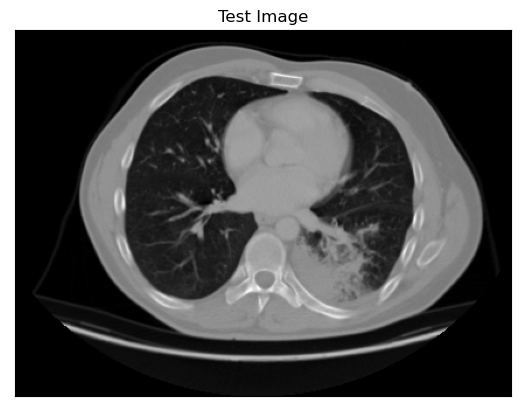

In [5]:
import cv2
# Reading an image in default mode
image_path = r"C:\Users\BOSS\Desktop\lung_dis_data\test\squamous.cell.carcinoma\000110 (2).png"
img = cv2.imread(image_path)
con = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Displaying the image 
plt.imshow(con)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


# Testing our model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Converting  single image to a batch.
predictions = ml_model.predict(input_arr)
predictions,predictions.shape

1/1 [==============================] - 0s 464ms/step


(array([[9.9996126e-01, 1.3500105e-09, 2.9641137e-07, 3.8541315e-05]],
       dtype=float32),
 (1, 4))

In [7]:
print(predictions)

[[9.9996126e-01 1.3500105e-09 2.9641137e-07 3.8541315e-05]]


In [8]:
result_index = np.argmax(predictions) #Return index of max element
                
print(result_index)


0


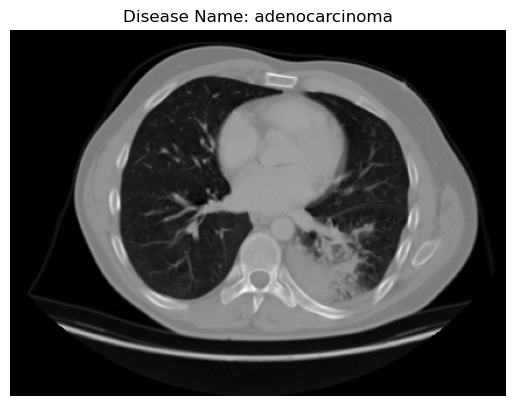

In [10]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.axis('off')
plt.show()